# Using deep learning algorithm- Recurrent Neural Network(RNN) for image classification

## What is deep learning?

Deep learning is inspired by the functionality of human brain cells called artificial neural network.
Deep learning is one of machine learning algorithm that takes data in form of images, videos, text and connections between all the neurons are adjusted according to the pattern of the data

Deep learning is a sub field within machine learning used for learning multiple levels of representation in order to model complex connection between the data
Higher-level features are defined with the help of lower levels and such hierarchy of features is called deep architecture. If we draw a graph showing how these concepts are built over each other the graph is deep with many layers. Hence, we call this learning approach as deep learning


## RNN - Recurrent Neural network


A recurrent neural network (RNN) is a class of artificial neural network where connections between units form a directed cycle. This creates an internal state of the network which allows it to exhibit dynamic temporal behavior.

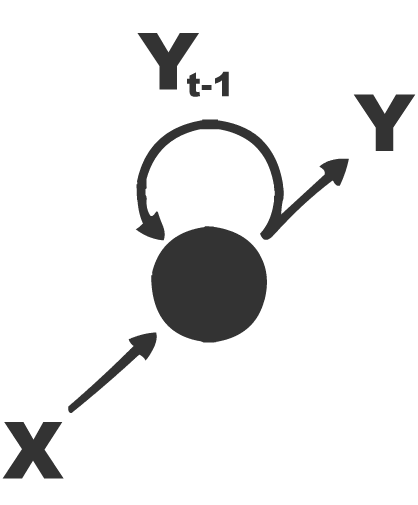

## Installing and Importing necessary libraries.


TensorFlow installation: https://www.tensorflow.org/install/

What is Tensorflow?
TensorFlow is an open source software library for numerical computation using dataflow graphs. 

The usual workflow of running a program in TensorFlow is as follows:

<b>Build a computational graph</b> this can be any mathematical operation TensorFlow supports.

<b>Initialize variables</b> to compile the variables defined previously

<b>Create session</b> this is where the magic starts!

<b>Run graph in session</b> the compiled graph is passed to the session, which starts its execution. 

<b>Close session</b> shutdown the session.


In [2]:
import tensorflow as tf
from tensorflow.contrib import rnn
#from tensorflow.python.ops import rnn, rnn_cell
import warnings; 
warnings.simplefilter('ignore')

## Loading Dataset

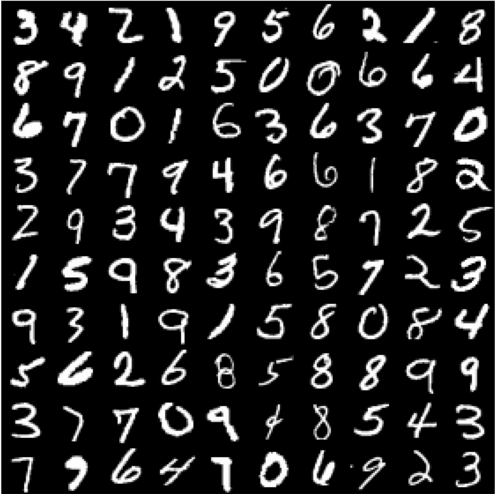

The MNIST Dataset can be downloaded from tensorflow mnist package

MNIST is a database of handwritten numbers.You can also refer to the <a href="http://yann.lecun.com/exdb/mnist/">link</a> to view and read about MNIST datatset. Since MNIST uses real-world data, it is an ideal database for training neural networks and machine learning tools that use pattern recognition.
Run the following cell to get the MNIST data set of images of handwritten numbers:



In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST-DATA", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-DATA/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-DATA/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST-DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST-DATA/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Setting Hyperparameters

In [4]:
learning_rate = 0.001
training_steps = 10000
batch_size = 128
display_step = 200
ninput = 28 
timesteps = 28 
hidden = 128 
num_of_classes = 10 

X = tf.placeholder("float", [None, timesteps, ninput])
Y = tf.placeholder("float", [None, num_of_classes])

weights = {'out': tf.Variable(tf.random_normal([hidden, num_of_classes]))}
biases = {'out': tf.Variable(tf.random_normal([num_of_classes]))}

### Defining the LSTM Cell

### LSTM
A LSTM network is an artificial neural network that contains LSTM blocks instead of, or in addition to, regular network units. A LSTM block may be described as a "smart" network unit that can remember a value for an arbitrary length of time.
A Long short-term memory network is well-suited to learn from experience to classify, process and predict time series when there are very long time lags of unknown size between important events.

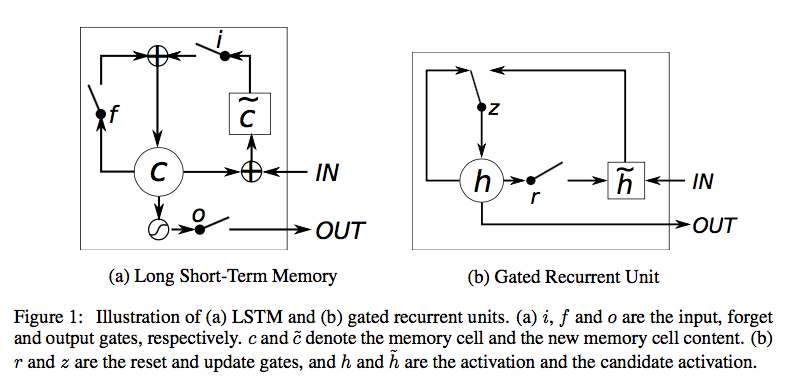

In [5]:
#defining the RNN model with LSTM cells
def RNN(x, weights, biases):
    x = tf.unstack(x, timesteps, 1)
    lstm_cell = rnn.BasicLSTMCell(hidden, forget_bias=1.0)
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

## Graph Model Creation using Adam Optimizer
Adam parameters

<b>alpha.</b> Also referred to as the learning rate or step size. The proportion that weights are updated (e.g. 0.001). Larger values (e.g. 0.3) results in faster initial learning before the rate is updated. Smaller values (e.g. 1.0E-5) slow learning right down during training

<b>beta1.</b> The exponential decay rate for the first moment estimates (e.g. 0.9).

<b>beta2.</b> The exponential decay rate for the second-moment estimates (e.g. 0.999). This value should be set close to 1.0 on problems with a sparse gradient (e.g. NLP and computer vision problems).

<b>epsilon.</b> Is a very small number to prevent any division by zero in the implementation (e.g. 10E-8).

In [6]:
#optimizer- Adam optimizer
#output function- softmax
#loss function used- cross entropy

lg = RNN(X, weights, biases)
prediction = tf.nn.softmax(lg)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=lg, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=0.9,beta2=0.999,epsilon=1e-08,use_locking=False,name='Adam')
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



### Initializing the variables
Here the init variable is initialized to global variable initializer so as to compile the previously initialized variables before starting the tensorflow session

In [7]:
init = tf.global_variables_initializer()

### Running the model and predicting the accuracy

Once the variables are initialized we start the session .Since we are using tensorflow package sessions are created to execute the compiled graph and after the session is executed completely it ends the session. 
The following cell creates a session calculates the training accuracy and once the model is trained the test accuracy is calculated.

In [8]:
with tf.Session() as sess:

    sess.run(init)
    for step in range(1, training_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        batch_x = batch_x.reshape((batch_size, timesteps, ninput))
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
    
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + "{:.4f}".format(loss) + ", Training Accuracy= " + "{:.3f}".format(acc))

    print("Completed")

    test_length = 10000
    test_data = mnist.test.images[:test_length].reshape((-1, timesteps, ninput))
    test_label = mnist.test.labels[:test_length]
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))

Step 1, Minibatch Loss= 2.4056, Training Accuracy= 0.094
Step 200, Minibatch Loss= 0.2380, Training Accuracy= 0.922
Step 400, Minibatch Loss= 0.2756, Training Accuracy= 0.898
Step 600, Minibatch Loss= 0.1557, Training Accuracy= 0.961
Step 800, Minibatch Loss= 0.0710, Training Accuracy= 0.984
Step 1000, Minibatch Loss= 0.0556, Training Accuracy= 0.977
Step 1200, Minibatch Loss= 0.0648, Training Accuracy= 0.984
Step 1400, Minibatch Loss= 0.0358, Training Accuracy= 0.992
Step 1600, Minibatch Loss= 0.0622, Training Accuracy= 0.969
Step 1800, Minibatch Loss= 0.0546, Training Accuracy= 0.977
Step 2000, Minibatch Loss= 0.0514, Training Accuracy= 0.984
Step 2200, Minibatch Loss= 0.0770, Training Accuracy= 0.969
Step 2400, Minibatch Loss= 0.0394, Training Accuracy= 0.984
Step 2600, Minibatch Loss= 0.0485, Training Accuracy= 0.984
Step 2800, Minibatch Loss= 0.0481, Training Accuracy= 0.992
Step 3000, Minibatch Loss= 0.0268, Training Accuracy= 0.984
Step 3200, Minibatch Loss= 0.0080, Training Acc

### The test accuracy achieved is 98.81%

# Licenses

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br>The text in the document by SHWETA TATIYA and RADHIKA GATHIA is licensed under <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br><br>


The code in the document by SHWETA TATIYA and RADHIKA GATHIA is licensed under the MIT License https://opensource.org/licenses/MIT

# References 

In [1]:
# Dataset 
#http://yann.lecun.com/exdb/mnist/

# References

# https://github.com/nikbearbrown/NEU_COE
# MIT 6.S191: Introduction to Deep Learning https://youtu.be/JN6H4rQvwgY